<a href="https://colab.research.google.com/github/winterForestStump/thesis/blob/main/evaluation/plotting_eval_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Regular QA

In [38]:
df_norag = pd.read_csv('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/phi-3_x_no_rag/eval_resuts_argilla_NoRagGeneralQA.csv')
df_rag = pd.read_csv('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/bge-reranker_x_phi3-4k/eval_resuts_argilla_generalQA.csv')
category_order = ['YES', 'UNSURE', 'NO']

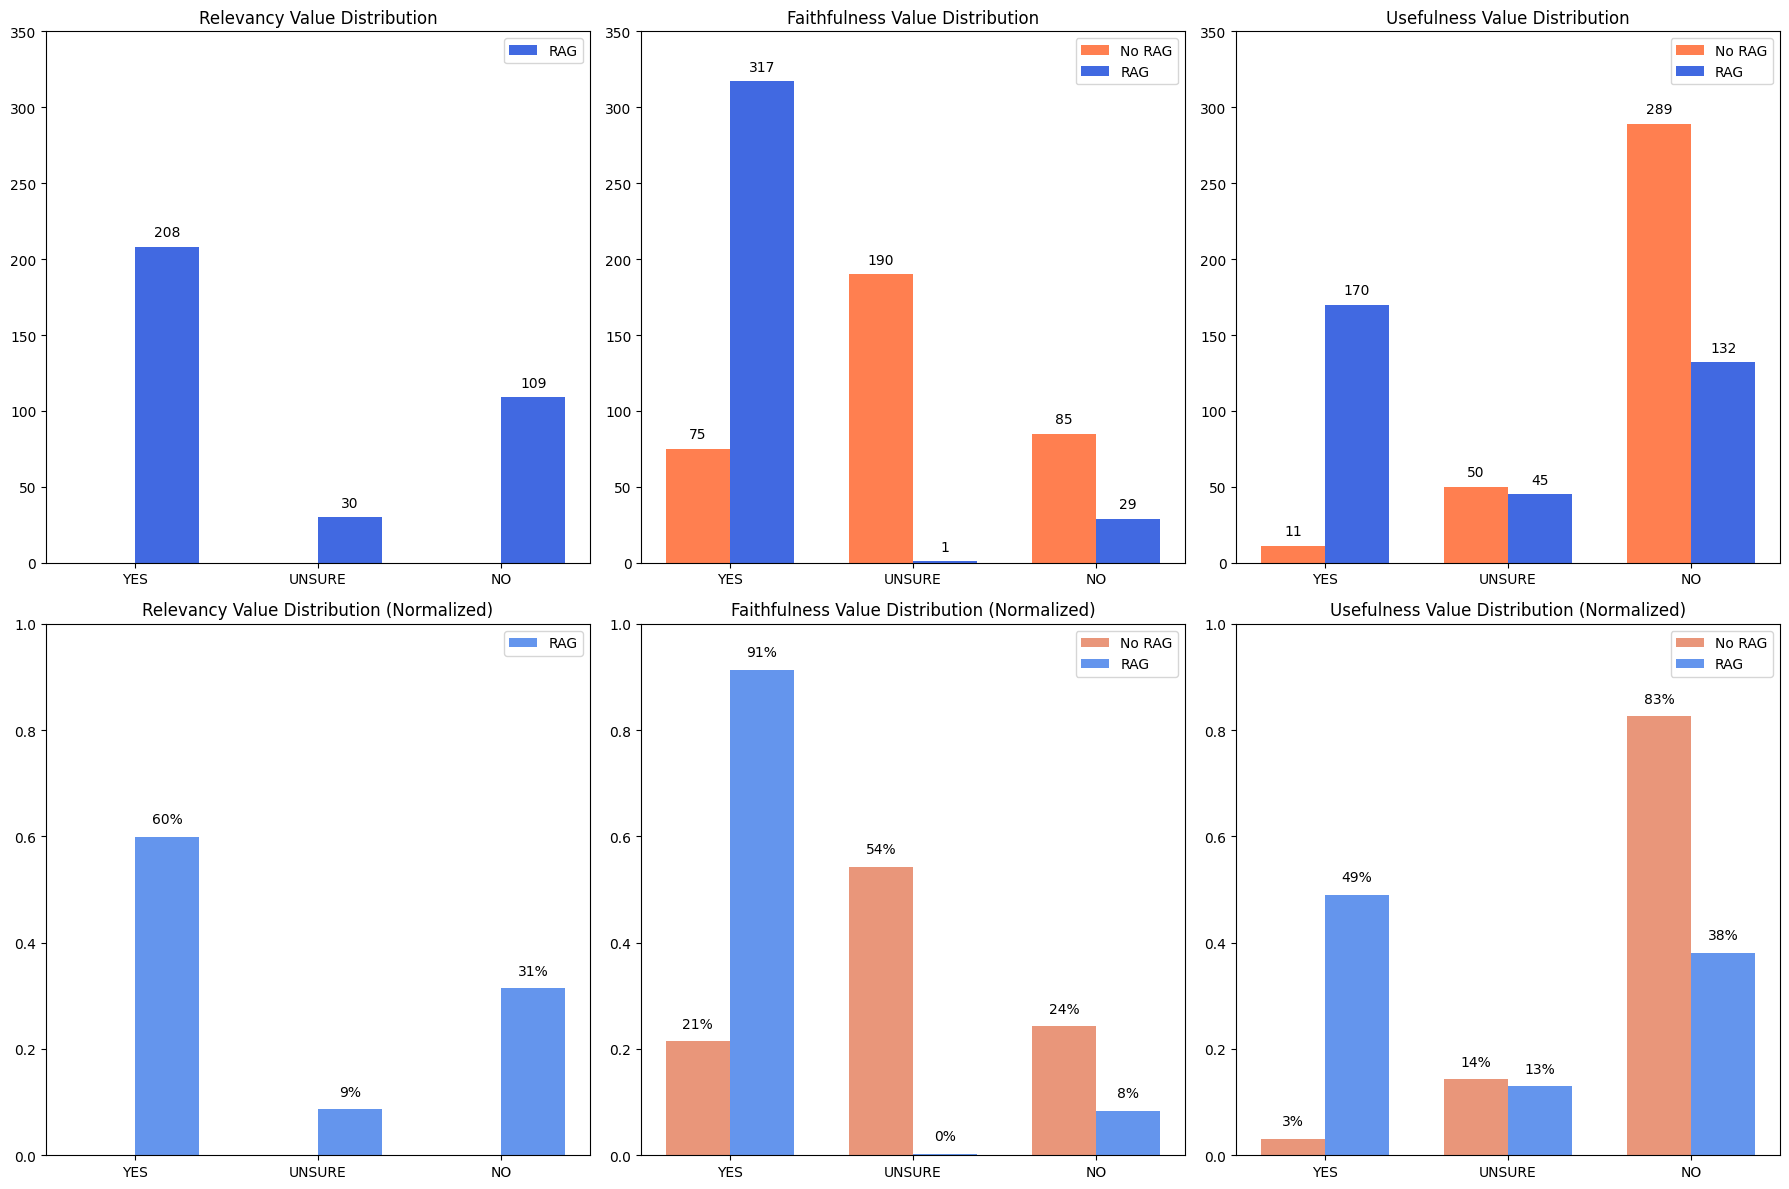

In [39]:
#NoRAG
faithfulness_counts_no_rag = df_norag['faithfulness_value'].value_counts().reindex(category_order)
usefulness_counts_no_rag = df_norag['usefulness_value'].value_counts().reindex(category_order)
relevancy_counts_no_rag = pd.Series(0, index=faithfulness_counts_no_rag.index, name='count')
faithfulness_norm_no_rag = df_norag['faithfulness_value'].value_counts(normalize=True).reindex(category_order)
usefulness_norm_no_rag = df_norag['usefulness_value'].value_counts(normalize=True).reindex(category_order)
relevancy_norm_no_rag = pd.Series(0, index=faithfulness_norm_no_rag.index, name='count')

#RAG
relevancy_counts_rag = df_rag['relevancy_value'].value_counts().reindex(category_order)
faithfulness_counts_rag = df_rag['faithfulness_value'].value_counts().reindex(category_order)
usefulness_counts_rag = df_rag['usefulness_value'].value_counts().reindex(category_order)
relevancy_norm_rag = df_rag['relevancy_value'].value_counts(normalize=True).reindex(category_order)
faithfulness_norm_rag = df_rag['faithfulness_value'].value_counts(normalize=True).reindex(category_order)
usefulness_norm_rag = df_rag['usefulness_value'].value_counts(normalize=True).reindex(category_order)


# Define the function to add labels for counts
def add_labels(counts, ax, offset):
    for i, count in enumerate(counts):
        ax.text(i + offset, count + 5, str(count), ha='center', va='bottom')

# Define the function to add labels for percentages
def add_labels_p(percentages, ax, offset):
    for i, percentage in enumerate(percentages):
        ax.text(i + offset, percentage + 0.02, f'{percentage*100:.0f}%', ha='center', va='bottom')

# Sample data
categories = relevancy_counts_rag.index
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(18, 12))

# Plot counts before and after RAG
ax1 = plt.subplot(2, 3, 1)
ax1.bar(x - width/2, relevancy_counts_no_rag, width, color='coral')
ax1.bar(x + width/2, relevancy_counts_rag, width, label='RAG', color='royalblue')
#add_labels(relevancy_counts_no_rag, ax1, -width/2)
add_labels(relevancy_counts_rag, ax1, width/2)
ax1.set_title('Relevancy Value Distribution')
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_ylim(0, 350)
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=0)
ax1.legend()

ax2 = plt.subplot(2, 3, 2)
ax2.bar(x - width/2, faithfulness_counts_no_rag, width, label='No RAG', color='coral')
ax2.bar(x + width/2, faithfulness_counts_rag, width, label='RAG', color='royalblue')
add_labels(faithfulness_counts_no_rag, ax2, -width/2)
add_labels(faithfulness_counts_rag, ax2, width/2)
ax2.set_title('Faithfulness Value Distribution')
ax2.set_xlabel(None)
ax2.set_ylim(0, 350)
ax2.set_xticks(x)
ax2.set_xticklabels(categories, rotation=0)
ax2.legend()

ax3 = plt.subplot(2, 3, 3)
ax3.bar(x - width/2, usefulness_counts_no_rag, width, label='No RAG', color='coral')
ax3.bar(x + width/2, usefulness_counts_rag, width, label='RAG', color='royalblue')
add_labels(usefulness_counts_no_rag, ax3, -width/2)
add_labels(usefulness_counts_rag, ax3, width/2)
ax3.set_title('Usefulness Value Distribution')
ax3.set_xlabel(None)
ax3.set_ylim(0, 350)
ax3.set_xticks(x)
ax3.set_xticklabels(categories, rotation=0)
ax3.legend()

# Plot normalized counts before and after RAG
ax4 = plt.subplot(2, 3, 4)
ax4.bar(x - width/2, relevancy_norm_no_rag, width, color='darksalmon')
ax4.bar(x + width/2, relevancy_norm_rag, width, label='RAG', color='cornflowerblue')
#add_labels_p(relevancy_norm_no_rag, ax4, -width/2)
add_labels_p(relevancy_norm_rag, ax4, width/2)
ax4.set_title('Relevancy Value Distribution (Normalized)')
ax4.set_ylabel(None)
ax4.set_xlabel(None)
ax4.set_ylim(0, 1)
ax4.set_xticks(x)
ax4.set_xticklabels(categories, rotation=0)
ax4.legend()

ax5 = plt.subplot(2, 3, 5)
ax5.bar(x - width/2, faithfulness_norm_no_rag, width, label='No RAG', color='darksalmon')
ax5.bar(x + width/2, faithfulness_norm_rag, width, label='RAG', color='cornflowerblue')
add_labels_p(faithfulness_norm_no_rag, ax5, -width/2)
add_labels_p(faithfulness_norm_rag, ax5, width/2)
ax5.set_title('Faithfulness Value Distribution (Normalized)')
ax5.set_xlabel(None)
ax5.set_ylim(0, 1)
ax5.set_xticks(x)
ax5.set_xticklabels(categories, rotation=0)
ax5.legend()

ax6 = plt.subplot(2, 3, 6)
ax6.bar(x - width/2, usefulness_norm_no_rag, width, label='No RAG', color='darksalmon')
ax6.bar(x + width/2, usefulness_norm_rag, width, label='RAG', color='cornflowerblue')
add_labels_p(usefulness_norm_no_rag, ax6, -width/2)
add_labels_p(usefulness_norm_rag, ax6, width/2)
ax6.set_title('Usefulness Value Distribution (Normalized)')
ax6.set_xlabel(None)
ax6.set_ylim(0, 1)
ax6.set_xticks(x)
ax6.set_xticklabels(categories, rotation=0)
ax6.legend()

plt.tight_layout()
plt.show()


## Heatmap

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


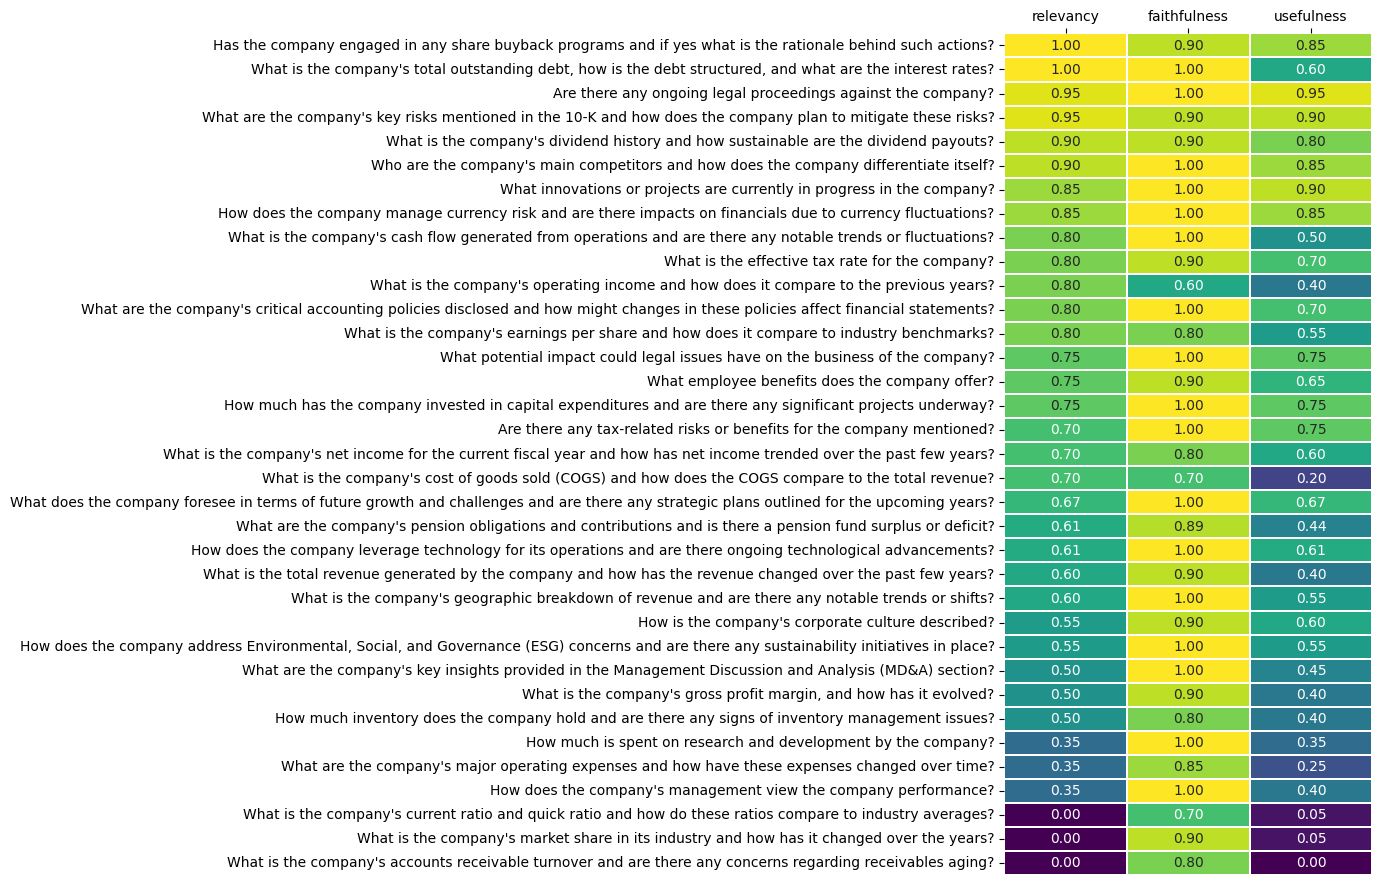

In [40]:
## 'Average Relevancy, Faithfulness, and Usefulness Values for Each Query'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical values to numerical values
value_mapping = {'YES': 1, 'UNSURE': 0.5, 'NO': 0}

df_rag['relevancy'] = df_rag['relevancy_value'].map(value_mapping)
df_rag['faithfulness'] = df_rag['faithfulness_value'].map(value_mapping)
df_rag['usefulness'] = df_rag['usefulness_value'].map(value_mapping)

# Calculate average values for each query
average_values = df_rag[['query', 'relevancy', 'faithfulness', 'usefulness']].groupby('query').mean().sort_values(by='relevancy', ascending=False)

# Create a heatmap for the average values
plt.figure(figsize=(4, 16), layout='compressed')
ax = sns.heatmap(average_values, annot=True, cmap='viridis', linewidths=.2, cbar=False, fmt='.2f')
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
plt.tick_params(axis='y', which='both', labelleft=True)
ax.set_ylabel(None)
plt.show()

# Financebench150

In [41]:
df_norag = pd.read_csv('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/phi-3_x_no_rag/eval_resuts_argilla_NoRagFinanceBench150.csv')
df_rag = pd.read_csv('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/financebench150/eval_resuts_argilla_financebench150.csv')
category_order = ['YES', 'UNSURE', 'NO']

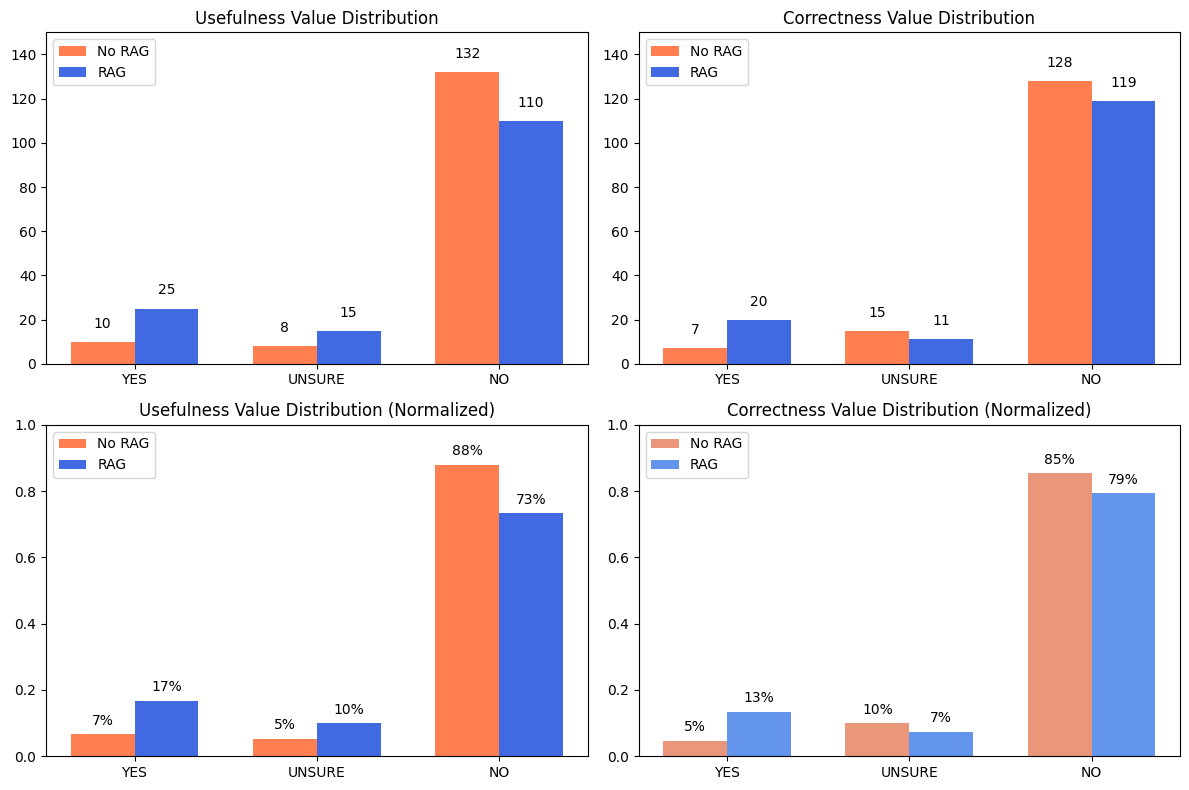

In [42]:
#NoRAG
usefulness_counts_no_rag = df_norag['usefulness_value'].value_counts().reindex(category_order)
correctness_counts_no_rag = df_norag['correctness_value'].value_counts().reindex(category_order)
usefulness_norm_no_rag = df_norag['usefulness_value'].value_counts(normalize=True).reindex(category_order)
correctness_norm_no_rag = df_norag['correctness_value'].value_counts(normalize=True).reindex(category_order)

#RAG
usefulness_counts_rag = df_rag['usefulness_value'].value_counts().reindex(category_order)
correctness_counts_rag = df_rag['correctness_value'].value_counts().reindex(category_order)
usefulness_norm_rag = df_rag['usefulness_value'].value_counts(normalize=True).reindex(category_order)
correctness_norm_rag = df_rag['correctness_value'].value_counts(normalize=True).reindex(category_order)


# Define the function to add labels for counts
def add_labels(counts, ax, offset):
    for i, count in enumerate(counts):
        ax.text(i + offset, count + 5, str(count), ha='center', va='bottom')

# Define the function to add labels for percentages
def add_labels_p(percentages, ax, offset):
    for i, percentage in enumerate(percentages):
        ax.text(i + offset, percentage + 0.02, f'{percentage*100:.0f}%', ha='center', va='bottom')

# Sample data
categories = relevancy_counts_rag.index
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(12, 8))

# Plot counts before and after RAG
ax1 = plt.subplot(2, 2, 1)
ax1.bar(x - width/2, usefulness_counts_no_rag, width, label='No RAG',color='coral')
ax1.bar(x + width/2, usefulness_counts_rag, width, label='RAG', color='royalblue')
add_labels(usefulness_counts_no_rag, ax1, -width/2)
add_labels(usefulness_counts_rag, ax1, width/2)
ax1.set_title('Usefulness Value Distribution')
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_ylim(0, 150)
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=0)
ax1.legend()

ax2 = plt.subplot(2, 2, 2)
ax2.bar(x - width/2, correctness_counts_no_rag, width, label='No RAG', color='coral')
ax2.bar(x + width/2, correctness_counts_rag, width, label='RAG', color='royalblue')
add_labels(correctness_counts_no_rag, ax2, -width/2)
add_labels(correctness_counts_rag, ax2, width/2)
ax2.set_title('Correctness Value Distribution')
ax2.set_xlabel(None)
ax2.set_ylim(0, 150)
ax2.set_xticks(x)
ax2.set_xticklabels(categories, rotation=0)
ax2.legend()

# Plot normalized counts before and after RAG
ax3 = plt.subplot(2, 2, 3)
ax3.bar(x - width/2, usefulness_norm_no_rag, width, label='No RAG', color='coral')
ax3.bar(x + width/2, usefulness_norm_rag, width, label='RAG', color='royalblue')
add_labels_p(usefulness_norm_no_rag, ax3, -width/2)
add_labels_p(usefulness_norm_rag, ax3, width/2)
ax3.set_title('Usefulness Value Distribution (Normalized)')
ax3.set_xlabel(None)
ax3.set_ylim(0, 1)
ax3.set_xticks(x)
ax3.set_xticklabels(categories, rotation=0)
ax3.legend()

ax4 = plt.subplot(2, 2, 4)
ax4.bar(x - width/2, correctness_norm_no_rag, width, label='No RAG', color='darksalmon')
ax4.bar(x + width/2, correctness_norm_rag, width, label='RAG', color='cornflowerblue')
add_labels_p(correctness_norm_no_rag, ax4, -width/2)
add_labels_p(correctness_norm_rag, ax4, width/2)
ax4.set_title('Correctness Value Distribution (Normalized)')
ax4.set_ylabel(None)
ax4.set_xlabel(None)
ax4.set_ylim(0, 1)
ax4.set_xticks(x)
ax4.set_xticklabels(categories, rotation=0)
ax4.legend()


plt.tight_layout()
plt.show()